# Projeto 1: Otimização de Campanhas de Marketing

### Importações

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

### Dados

In [22]:
df = pd.read_csv("campaigns.csv")
df.head()

,campaign_id,budget,channel,engagement,roi
0,1,5000,Facebook,1200,1.5
1,2,10000,Google,3000,2.0
2,3,7000,TV,2500,1.8
3,4,3000,Instagram,800,1.2
4,5,20000,Google,5000,2.5


### Pré-Processamento

In [23]:
# Dividindo as variáveis entre preditoras e variável alvo (ou dependente)
X = df[["budget", "channel", "engagement"]]
y = df["roi"]

# one hot para channel
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[["channel"]])

X_encoded

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [24]:
# Como o one-hot encoding foi utilizado nas variáveis preditoras, os dados acabaram ficando com apenas uma dimensão (em forma de vetor).
#Este reshape garante que os dados retornem ao formato de matriz para rodar o modelo de ML
X_encoded = X_encoded.reshape(-1, X_encoded.shape[1])

# O código abaixo combina colunas numéricas que já existiam (budget e engagement) com as variáveis que foram codificadas no one-hot encoding.
# Isso cria uma matriz final de entrada (X_final) com todas as variáveis relevantes que serão usadas no modelo.
X_final = np.hstack((X[["budget", "engagement"]].values, X_encoded))

X_final

array([[5.0e+03, 1.2e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+04, 3.0e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [7.0e+03, 2.5e+03, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
       [3.0e+03, 8.0e+02, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00],
       [2.0e+04, 5.0e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [1.5e+04, 4.0e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [4.0e+03, 1.0e+03, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00],
       [8.0e+03, 2.2e+03, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
       [1.2e+04, 3.5e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [9.0e+03, 2.8e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]])

In [25]:
# Dividir dados em treino e teste, com 70% do dataset para treino e 30% para teste.
#Além disso, utilizamos o random_state=42 para garantir a reprodutibilidade dos resultados, para que os resultados sempre sejam os mesmos sempre que o código for executado
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

### Treinamento do Modelo

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Avaliação do Modelo

In [27]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calcular o Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.008880675056313457
Root Mean Squared Error (RMSE): 0.09423733366513219
Mean Absolute Error (MAE): 0.059717449408166846


# Visualização Gráfica da Relação entre as Variáveis


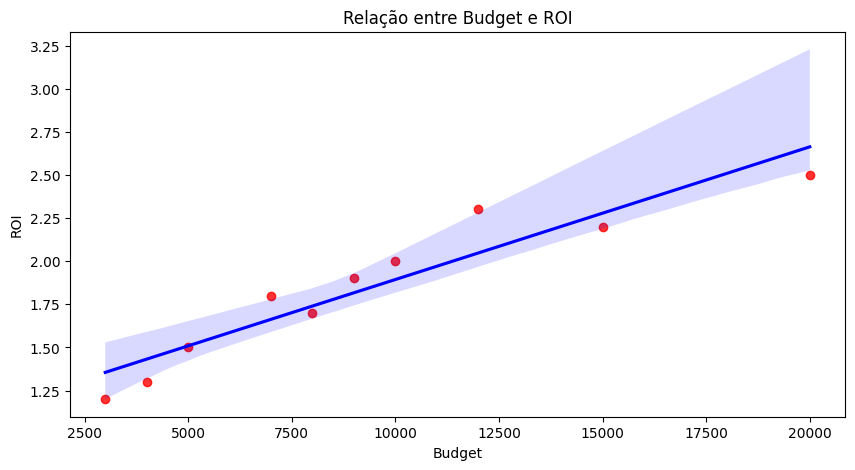

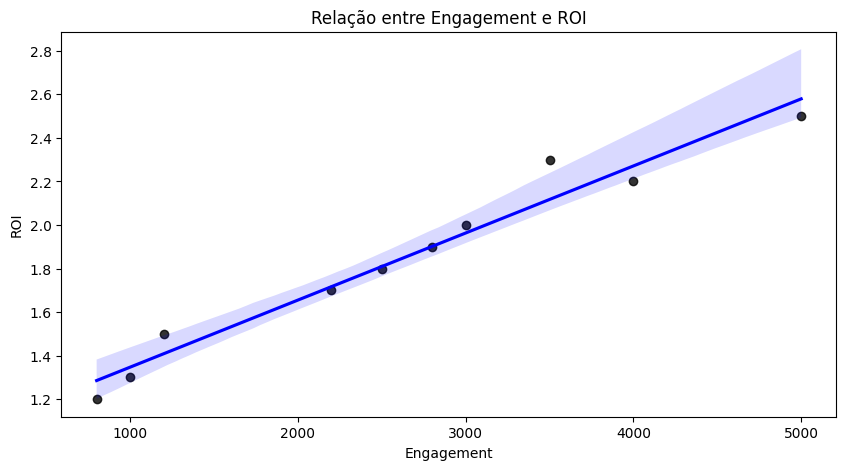

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.regplot(x="budget", y="roi", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel("Budget")
plt.ylabel("ROI")
plt.title("Relação entre Budget e ROI")
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(x="engagement", y="roi", data=df, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.xlabel("Engagement")
plt.ylabel("ROI")
plt.title("Relação entre Engagement e ROI")
plt.show()


# Otimização de Campanhas

In [29]:
#Primeiro, criamos uma função para sugerir a otimização de campanhas de marketing com base em 3 variáveis chave: budget, channel e engagement
def suggest_optimization(budget, channel, engagement):
    input_df = pd.DataFrame([[budget, channel, engagement]], columns=["budget", "channel", "engagement"])

    # pré-processa da mesma forma feita no modelo
    channel_encoded = encoder.transform(input_df[["channel"]]) #Transforma a variável categórica "channel" em dummies.
    channel_encoded = channel_encoded.reshape(1, -1)  # Ajuste para evitar erro de dimensão, garantindo que tenha uma linha e múltiplas colunas
    input_data = np.hstack((input_df[["budget", "engagement"]].values, channel_encoded)) #Concatena horizontalmente os valores numéricos de "budget" e "engagement" com os valores codificados, criando um vetor completo de entrada no mesmo formato do que o utilizado pelo modelo durante o treinamento

    # Prever ROI
    predicted_roi = model.predict(input_data)[0]
    return predicted_roi

# Comparação de Canais

In [30]:
def compare_channels(budget, engagement):
    # Obtém a lista de canais possíveis codificados pelo encoder
    possible_channels = encoder.categories_[0]

    # Inicializa variáveis para armazenar o melhor canal e o maior ROI encontrado
    best_channel = None
    best_roi = -float("inf")

    # Lista para guardar resultados de cada canal
    results = []

    # Para cada canal possível, prevê o ROI usando a função suggest_optimization
    for channel in possible_channels:
        predicted_roi = suggest_optimization(budget, channel, engagement)

        # Armazena o canal e o ROI previsto na lista de resultados
        results.append((channel, predicted_roi))

        # Atualiza o melhor canal e ROI caso o atual seja maior
        if predicted_roi > best_roi:
            best_roi = predicted_roi
            best_channel = channel

    # Imprime a comparação dos ROIs para todos os canais
    print("Comparação entre canais:")
    for channel, roi in results:
        print(f"Canal: {channel}, ROI Previsto: {roi:.2f}")

    # Retorna o melhor canal sugerido com seu ROI previsto formatado
    return f"Melhor canal sugerido: {best_channel} com ROI previsto de {best_roi:.2f}."



### Previsões de ROI

Dado o Budget, o Canal e o Engangement, qual o ROI?

In [31]:
budget = 6000
channel = "Facebook"
engagement = 1400
roi = suggest_optimization(budget, channel, engagement)
print(f"ROI previsto: {roi:.2f}")

ROI previsto: 1.54



Considerando somente Budget e Engagement, qual channel tem maior ROI?

In [32]:
budget = 6000
engagement = 1400
best_channel = compare_channels(budget, engagement)
print(best_channel)

Comparação entre canais:
Canal: Facebook, ROI Previsto: 1.54
Canal: Google, ROI Previsto: 1.60
Canal: Instagram, ROI Previsto: 1.37
Canal: TV, ROI Previsto: 1.50
Melhor canal sugerido: Google com ROI previsto de 1.60.
